In [2]:
push!(LOAD_PATH, "/home/aaron/projects/Ising/src/Julia");

In [3]:
using SpinBodies, WalterMethod
using PyPlot, LaTeXStrings

In [4]:
n = 2^6
T = 2.0;

In [5]:
lattice = SpinLattice(n, T)
ps = vec([lattice.f(-2b.E, T) for b in lattice.bs])
tree = WalterTree(ps);

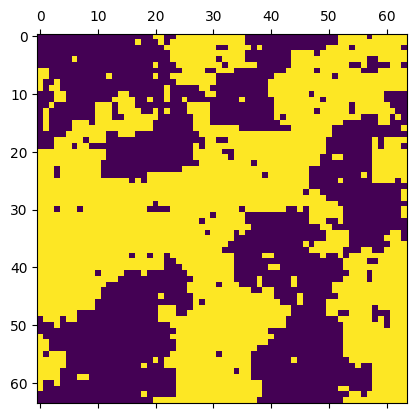

LoadError: InterruptException:

In [6]:
fig, ax = PyPlot.subplots();
for i = 1:1e5
    walter_step!(lattice, tree)
    if i % 100 == 0
        ax.cla()
        ax.matshow(visualize(lattice))
        display(fig)
        PyPlot.pause(0.01)
        IJulia.clear_output(true)
    end
end

In [7]:
T = 1.0
pstart = 2
np = 10
steps = 1e7
data = Vector{Float64}(undef, np);

In [8]:
for p = pstart:pstart+np-1
    n = 2^p
    lattice = SpinLattice(n, T)
    ps = vec([lattice.f(-2b.E, T) for b in lattice.bs])
    tree = WalterTree(ps)
    time = @elapsed for _ in 1:steps
        walter_step!(lattice, tree)
    end
    data[p-pstart+1] = time / steps
end

In [22]:
data

10-element Array{Float64,1}:
 4.485215628099998
 4.499593662199999
 4.601395516599998
 4.686250070700001
 4.8263838201
 5.0096036144
 5.300757393499999
 5.721442848099999
 6.699831276699999
 7.6157598679

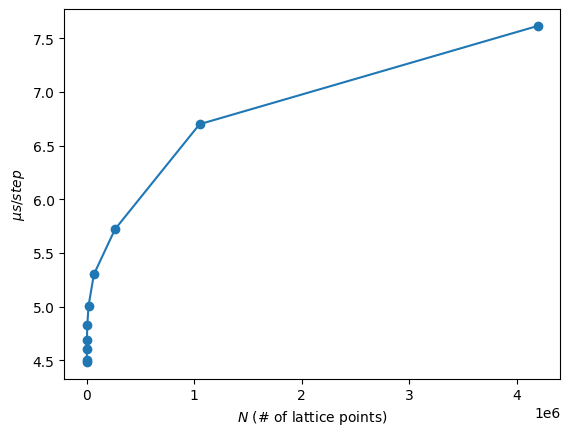

In [23]:
fig, ax = PyPlot.subplots()
ns = [(2^p)^2 for p in pstart:pstart+np-1]
ax.plot(ns, data)
ax.scatter(ns, data)
xlabel(L"N" * " (# of lattice points)")
ylabel(L"\mu s / step")
savefig("logscaling")